# Проект по А/B-тестированию

# Шаг 0. Введение

Цель проекта - проверка корректности проведения А/В теста и анализ полученных результатов

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import datetime as dt
import math as mth

# Шаг 1. Загрузка и предоработка данных

In [2]:
final_ab_participants=pd.read_csv('final_ab_participants.csv')
final_ab_participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


In [3]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


In [4]:
final_ab_participants.duplicated().value_counts()

False    18268
dtype: int64

Дубликатов и пропусков нет. Типы данных опредлены верно

------------

In [5]:
final_ab_events=pd.read_csv('final_ab_events.csv')
final_ab_events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [6]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [7]:
final_ab_events.duplicated().value_counts()

False    440317
dtype: int64

In [8]:
final_ab_events.query('details=="Nan"').event_name.value_counts()

login           189552
product_page    125563
product_cart     62462
Name: event_name, dtype: int64

In [9]:
final_ab_events['event_dt']=pd.to_datetime(final_ab_events['event_dt'])

Дубликатов данных нет. Столбец дат приведен к нужному типу. Пропуски цен обусловленны отсутствием факта продажи. 

------------

In [10]:
final_ab_new_users=pd.read_csv('final_ab_new_users.csv')
final_ab_new_users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [11]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


In [12]:
final_ab_new_users.duplicated().value_counts()

False    61733
dtype: int64

In [13]:
final_ab_new_users['first_date']=pd.to_datetime(final_ab_new_users['first_date'])

Дубликатов и пропусков в данных нет. Столбец дат привели к нужному формату

------------

In [14]:
ab_project_marketing_events=pd.read_csv('ab_project_marketing_events.csv')
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [15]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


In [16]:
ab_project_marketing_events.duplicated().value_counts()

False    14
dtype: int64

In [17]:
ab_project_marketing_events['start_dt']=pd.to_datetime(ab_project_marketing_events['start_dt'])
ab_project_marketing_events['finish_dt']=pd.to_datetime(ab_project_marketing_events['finish_dt'])

Дубликатов и пропусков в данных нет. Столбцы дат привели к нужному формату

# Шаг 2. Исследовательский анализ данных

### Исследуем конверсию

Объединим таблицы событий, новых пользователей и регионов

In [18]:
data=final_ab_events.merge(final_ab_participants,  on ='user_id' ).merge(final_ab_new_users[['user_id','region','first_date']], on='user_id')
data['event_dt']=pd.to_datetime(data['event_dt']).dt.date
data['first_date']=pd.to_datetime(data['first_date']).dt.date

Оставим в таблице данные только по тесту recommender_system_test

In [19]:
data=data.query('ab_test == "recommender_system_test"')

Оставим в таблице только пользоваателей из EU

In [20]:
data=data.query('region == "EU"')
data

,user_id,event_dt,event_name,details,group,ab_test,region,first_date
12,831887FE7F2D6CBA,2020-12-07,purchase,4.99,A,recommender_system_test,EU,2020-12-07
13,831887FE7F2D6CBA,2020-12-09,purchase,99.99,A,recommender_system_test,EU,2020-12-07
14,831887FE7F2D6CBA,2020-12-07,product_cart,NaN,A,recommender_system_test,EU,2020-12-07
15,831887FE7F2D6CBA,2020-12-08,product_cart,NaN,A,recommender_system_test,EU,2020-12-07
16,831887FE7F2D6CBA,2020-12-09,product_cart,NaN,A,recommender_system_test,EU,2020-12-07
...,...,...,...,...,...,...,...,...
106168,1484BBF124DB1B18,2020-12-27,login,NaN,A,recommender_system_test,EU,2020-12-21
106171,BEF16764A13AEC34,2020-12-21,login,NaN,B,recommender_system_test,EU,2020-12-21
106173,BEF16764A13AEC34,2020-12-22,login,NaN,B,recommender_system_test,EU,2020-12-21
106175,BEF16764A13AEC34,2020-12-24,login,NaN,B,recommender_system_test,EU,2020-12-21


Узнаем сколько пользователй приняло участие в тесте

In [21]:
a=data.user_id.nunique()
a

3481

И общее число пользователй из региона EU

In [22]:
b=final_ab_new_users.query('region=="EU"').user_id.nunique()
b

46270

In [23]:
print('В тесте приняло участие {:.2%} процентов пользователй из EU'.format(a/b))

В тесте приняло участие 7.52% процентов пользователй из EU


------------

Оставим в таблице только события пользователей, у которых с момента регистрации прошло 14 дней

In [24]:
data=data[data['event_dt'].between(data['first_date'], data['first_date']+pd.Timedelta('14 days'))]
data

,user_id,event_dt,event_name,details,group,ab_test,region,first_date
12,831887FE7F2D6CBA,2020-12-07,purchase,4.99,A,recommender_system_test,EU,2020-12-07
13,831887FE7F2D6CBA,2020-12-09,purchase,99.99,A,recommender_system_test,EU,2020-12-07
14,831887FE7F2D6CBA,2020-12-07,product_cart,NaN,A,recommender_system_test,EU,2020-12-07
15,831887FE7F2D6CBA,2020-12-08,product_cart,NaN,A,recommender_system_test,EU,2020-12-07
16,831887FE7F2D6CBA,2020-12-09,product_cart,NaN,A,recommender_system_test,EU,2020-12-07
...,...,...,...,...,...,...,...,...
106168,1484BBF124DB1B18,2020-12-27,login,NaN,A,recommender_system_test,EU,2020-12-21
106171,BEF16764A13AEC34,2020-12-21,login,NaN,B,recommender_system_test,EU,2020-12-21
106173,BEF16764A13AEC34,2020-12-22,login,NaN,B,recommender_system_test,EU,2020-12-21
106175,BEF16764A13AEC34,2020-12-24,login,NaN,B,recommender_system_test,EU,2020-12-21


Посчитаем, сколько уникальных пользователей совершали каждое из событий

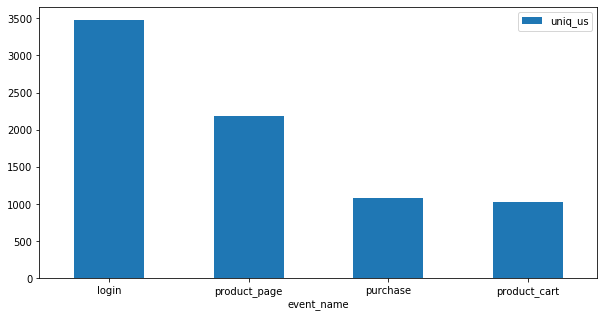

In [25]:
voronka=data.groupby('event_name')['user_id'].nunique().reset_index()
voronka=voronka.rename(columns={'user_id':'uniq_us'})
voronka=voronka.sort_values(by='uniq_us', ascending=False)
voronka.plot(x='event_name',y='uniq_us', kind='bar', rot=0, figsize=(10,5))

Этап purchase немного опередил product_card. Видимо на сайте есть возможность сделать заказ без добавления в корзину.

Взглянем на конверсию в воронке на разных этапах

In [26]:
voronka['dolya']=(voronka['uniq_us']/voronka['uniq_us'].shift()*100).round(1)
voronka.at[0,'dolya']=100
voronka

,event_name,uniq_us,dolya
0,login,3480,100.0
2,product_page,2178,62.6
3,purchase,1082,49.7
1,product_cart,1026,94.8


Больше всего пользователей теряется на главном экране

Узнаем какой процент пользователей доходит от первого события до оплаты

In [27]:
round((voronka.iloc[3]['uniq_us']/voronka.iloc[0]['uniq_us']*100),1)

29.5

### Проверим, обладают ли выборки одинаковыми распределениями количества событий на пользователя

Посмотрим на соотношение выборок

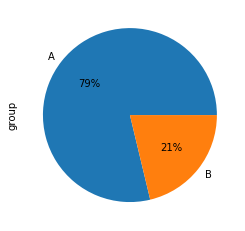

In [28]:
data.group.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [29]:
data.group.value_counts()

A    17977
B     4851
Name: group, dtype: int64

Выборки значительно отличаются количественно. Возможно это связано с тем, что не был проведен A/A тест и разбивка работала некорректно.

------------

Создадим фрейм с данными выборки А

In [30]:
data_a=data.query('group == "A"')

Посмотрим на распределение колличества событий на каждого пользователя

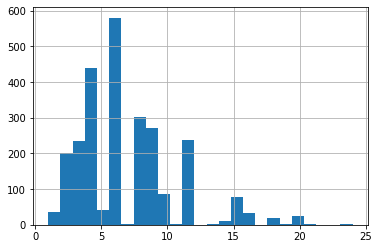

In [31]:
data_a.groupby('user_id').event_name.count().hist(bins=25)

Изучим характер распределения

In [32]:
data_a.groupby('user_id').event_name.count().describe()

count    2604.00000
mean        6.90361
std         3.84470
min         1.00000
25%         4.00000
50%         6.00000
75%         9.00000
max        24.00000
Name: event_name, dtype: float64

------------

Создадим фрейм с данными выборки B

In [33]:
data_b=data.query('group == "B"')

Посмотрим на распределение колличества событий на каждого пользователя

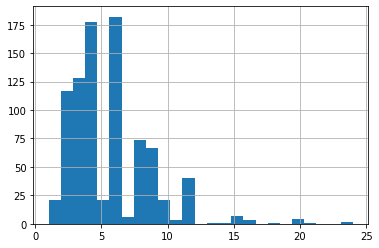

In [34]:
data_b.groupby('user_id').event_name.count().hist(bins=25)

Изучим характер распределения

In [35]:
data_b.groupby('user_id').event_name.count().describe()

count    877.000000
mean       5.531357
std        3.314281
min        1.000000
25%        3.000000
50%        4.000000
75%        8.000000
max       24.000000
Name: event_name, dtype: float64

Качественно выборки тоже неодинаковы 

-----------------

### Проверим присутствуют ли в выборках одни и те же пользователи

Создадим фрейм со списком уникальных пользователей группы В и столбцом факта совпадения id со списком группы А

In [36]:
proverka=pd.DataFrame()
proverka['id']=data_b.user_id.unique()
proverka['chek']=proverka['id'].apply(lambda x : 1 if x in data_a.user_id.unique() else 0)

In [37]:
proverka['chek'].value_counts()

0    877
Name: chek, dtype: int64

Совпадений пользователей не обнаружено

Проверим не участвовали ли пользователи recommender_system_test в другом тесте

In [38]:
test=final_ab_participants.query('ab_test == "interface_eu_test" and group == "B" ')
test

,user_id,group,ab_test
6705,2BA8FA8754D1FE50,B,interface_eu_test
6706,FB6F6BC119E1DBD5,B,interface_eu_test
6707,2D2E7AA539CF348F,B,interface_eu_test
6709,76B6CDF2A8B1DBFC,B,interface_eu_test
6712,10DAD07E71B44F26,B,interface_eu_test
...,...,...,...
18254,06CB5B54FDFEA69F,B,interface_eu_test
18260,60A2B3B987457ECE,B,interface_eu_test
18262,4155D795096E6CFE,B,interface_eu_test
18263,1D302F8688B91781,B,interface_eu_test


In [39]:
proverka2=pd.DataFrame()
proverka2['id']=data.user_id.unique()
proverka2['chek']=proverka2['id'].apply(lambda x : 1 if x in test.user_id.unique() else 0)

In [40]:
proverka2['chek'].value_counts()

0    3050
1     431
Name: chek, dtype: int64

Обнаружилось пересечение с тестом interface_eu_test. В виду того что тесты независимы оставим этих пользователй

-----------------

### Узнаем как число событий распределено по дням

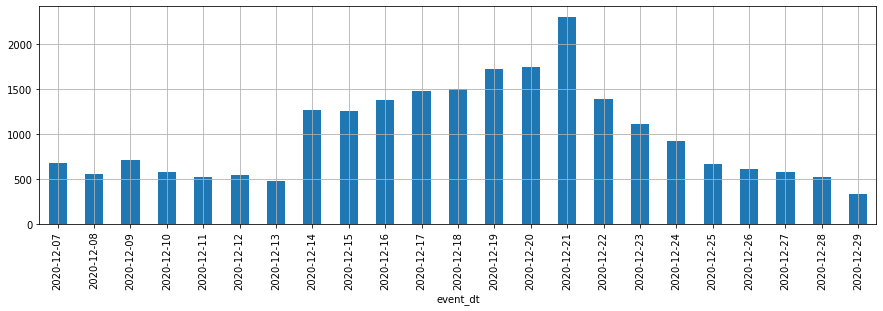

In [41]:
data.groupby('event_dt')['event_name'].count().plot(grid=True,kind='bar', rot=90, figsize=(15,4))

За неделю до Нового Года клиенты наиболее активны. Затем идет спад. Акция Christmas&New Year Promo (2020-12-25 2021-01-03) не повлияла на ситуацию.

# Шаг 3. Проведем оценку результатов A/B-тестирования z-критерием

- Сформулируем гипотезу H₀ - конверсия каждого события в воронке для выборок А и В одинакова.
- Альтернативная гипотеза H₁ - конверсия каждого события в воронке для выборок А и В отличается.

Создадим фреймы с воронкой для каждой группы

In [42]:
voronka_a=data_a.groupby('event_name')['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)
voronka_a=voronka_a.rename(columns={'user_id':'uniq_us'})
voronka_a

,event_name,uniq_us
0,login,2604
2,product_page,1685
3,purchase,833
1,product_cart,782


Конверсия группы А в процентах

In [43]:
round(voronka_a.iloc[3]['uniq_us']/ voronka_a.iloc[0]['uniq_us']*100,2)

30.03

In [44]:
voronka_b=data_b.groupby('event_name')['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)
voronka_b=voronka_b.rename(columns={'user_id':'uniq_us'})
voronka_b

,event_name,uniq_us
0,login,876
2,product_page,493
3,purchase,249
1,product_cart,244


Конверсия группы В в процентах

In [45]:
round(voronka_b.iloc[3]['uniq_us']/ voronka_b.iloc[0]['uniq_us']*100,2)

27.85

Напишем функцию сравнения выборок по z критерию

In [46]:
def proverka(successes, trials):
    alpha = .01 # критический уровень статистической значимости 
    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]
    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]
    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    # разница пропорций в датасетах
    difference = p1 - p2
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    # норамльное распределение 
    distr = st.norm(0, 1) 
    # уровень значимости
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', round(p_value,3))
    if (p_value < alpha):
        print("между долями есть значимая разница")
    else:
        print("нет оснований считать доли разными")

Запустим цикл для сравнения событий с событием login

In [51]:
for i, val in enumerate (voronka_a['event_name']):
    if i!=0:
        print('step' +str(i+1)+' - ' + voronka_a.iloc[i]['event_name'])
        successes = np.array([voronka_a.iloc[i]['uniq_us'], voronka_b.iloc[i]['uniq_us']])
        trials = np.array([voronka_a.iloc[0]['uniq_us'], voronka_b.iloc[0]['uniq_us']])
        proverka(successes, trials)
        print (i)
        print()

step2 - product_page
p-значение:  0.0
между долями есть значимая разница
1

step3 - purchase
p-значение:  0.049
нет оснований считать доли разными
2

step4 - product_cart
p-значение:  0.222
нет оснований считать доли разными
3



In [49]:
voronka_b

,event_name,uniq_us
0,login,876
2,product_page,493
3,purchase,249
1,product_cart,244


In [50]:
voronka_a

,event_name,uniq_us
0,login,2604
2,product_page,1685
3,purchase,833
1,product_cart,782


# Шаг 4. Заключение

- A/A-тест не проводился - результаты остались неизвестны
- Общее число участников теста recommender_system_test 3481, ожидалось - 6000
- В тесте приняло участие 7.5% процентов пользователй из EU вместо заявленных 15%
- Конверсия для recommender_system_test в группе А составила 30%, в В - почти 28%
- Выборки оказались не равновелики, выборка А в 3 раза больше В
- Статтсеты не выявили отличий, однако группа В показала худшие результаты
- Ввиду некорректности проведения теста и отрицательных результатов, тест нужно остановаить
- Запускать тест повторно необязательно, так как стат тесты не обнаружили разницы в выборках, а группа В получила результат хуже. Изменения в рекомендательной системе не оправдали себя